In [ ]:
import pandas as pd

# Example: Load your CSV file into a DataFrame
df = pd.read_csv("ramayana_chapters_with_numbers.csv")

# Alternatively, if you have the female_character_chapters list:
df = pd.DataFrame(female_character_chapters, columns=['text'])

In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Make sure you have downloaded stopwords if you want to use it
# nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function for preprocessing
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the function to the text column
df['clean_text'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK data if not already downloaded
nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenizing the text into words
df['tokens'] = df['clean_text'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Example female character names (you can replace this with actual names from Ramayana)
female_names = ['sita', 'mandodari', 'kaikeyi', 'shurpanakha']

# Function to check for female-associated words
def find_female_words(tokens, female_names):
    return [word for word in tokens if word in female_names]

# Apply this function to get words associated with female characters
df['female_words'] = df['tokens'].apply(lambda tokens: find_female_words(tokens, female_names))

# View the result
df[['text', 'female_words']]

,text,female_words
0,1. The Conception,[]
1,2. Sage Viswamitra,[]
2,3. Trisanku,[]
3,4. Rama Leaves Home,[]
4,5. Rama Slays The Monsters,[]
...,...,...
71,72. Is This Narayana Himself?,[]
72,73. The Death Of Indrajit,[]
73,74. End Of Ravana,[]
74,75. The End,[]


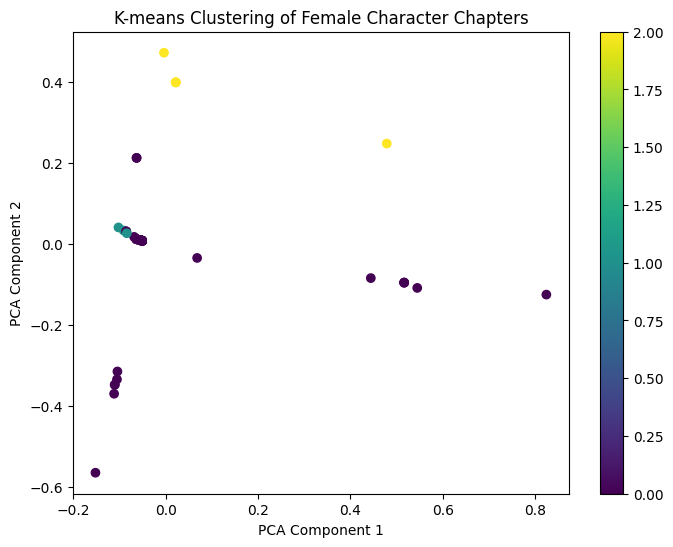

In [ ]:
# Reduce the dimensions of the TF-IDF matrix using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create a DataFrame with PCA components and clusters
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster'], cmap='viridis')
plt.title('K-means Clustering of Female Character Chapters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [ ]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 3.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


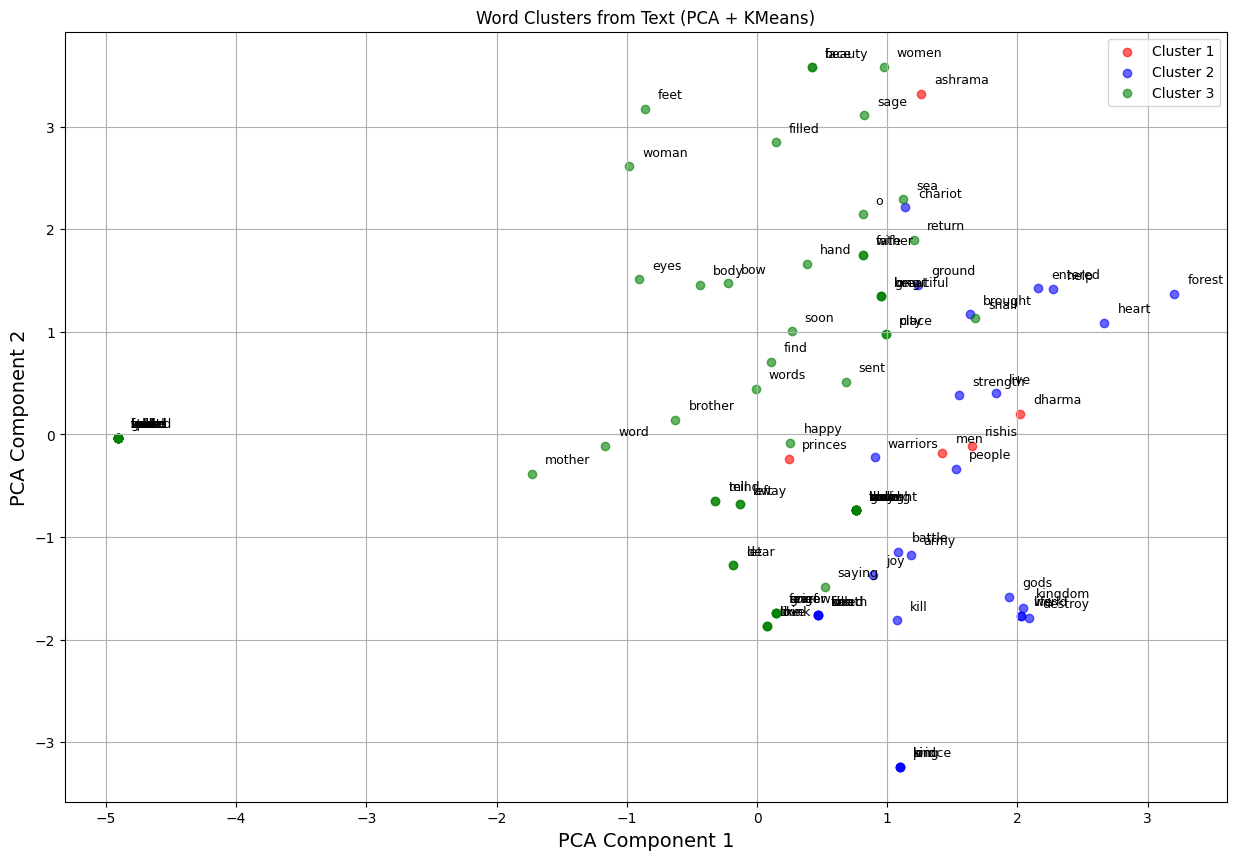

In [ ]:
import spacy
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load spaCy model with word vectors
nlp = spacy.load("en_core_web_md")

# Read the text
filename = "female_character_chapters.txt"
file_path = f"/content/{filename}"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()
doc = nlp(text)

# Filter tokens: real words, not stopwords/punct/digits/named entities
named_entities = {ent.text for ent in doc.ents}

words = [
    token.text.lower()
    for token in doc
    if token.is_alpha
    and not token.is_stop
    and token.text not in named_entities
]

# Get top 100 frequent words
top_words = [word for word, _ in Counter(words).most_common(100)]

# Get word vectors
word_vecs = np.array([nlp(word).vector for word in top_words if nlp(word).has_vector])
filtered_words = [word for word in top_words if nlp(word).has_vector]

# Clustering with KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
labels = kmeans.fit_predict(word_vecs)

# Reduce dimensions for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vecs)

# Plot
plt.figure(figsize=(15, 10))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(num_clusters):
    xs = reduced[labels == i, 0]
    ys = reduced[labels == i, 1]
    plt.scatter(xs, ys, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

# Add word labels
for i, word in enumerate(filtered_words):
    plt.text(reduced[i, 0]+0.1, reduced[i, 1]+0.1, word, fontsize=9)

plt.title("Word Clusters from Text (PCA + KMeans)")
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

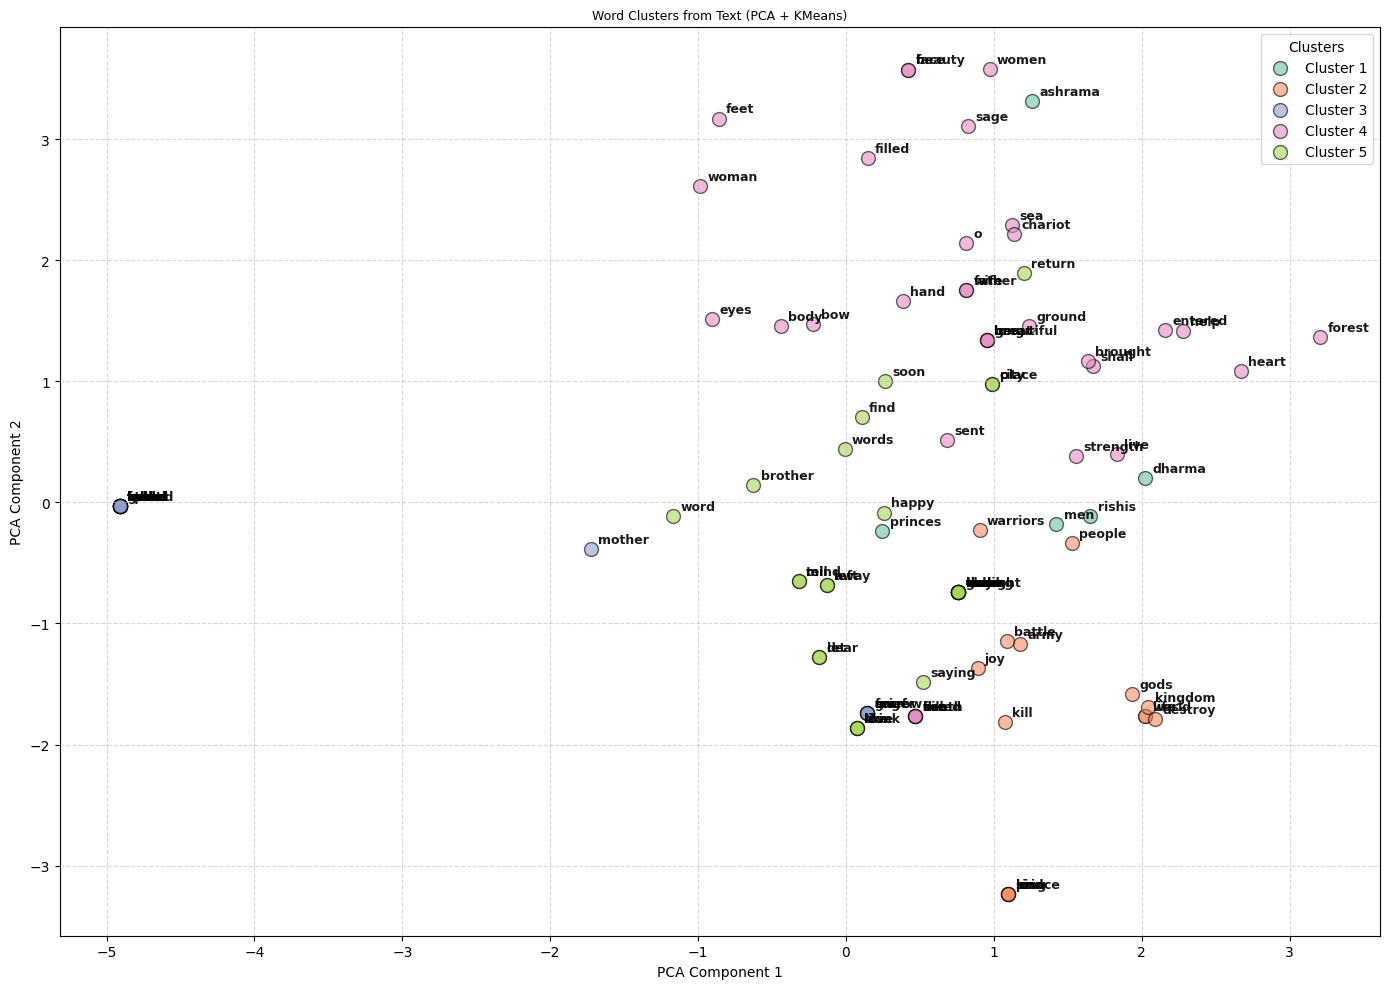

In [ ]:
import spacy
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load spaCy model with word vectors
nlp = spacy.load("en_core_web_md")

# Read the text
filename = "female_character_chapters.txt"
file_path = f"/content/{filename}"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()
doc = nlp(text)

# Filter tokens: real words, not stopwords/punct/digits/named entities
named_entities = {ent.text for ent in doc.ents}
words = [
    token.text.lower()
    for token in doc
    if token.is_alpha
    and not token.is_stop
    and token.text not in named_entities
]

# Get top 100 frequent words
top_words = [word for word, _ in Counter(words).most_common(100)]

# Get word vectors
word_vecs = np.array([nlp(word).vector for word in top_words if nlp(word).has_vector])
filtered_words = [word for word in top_words if nlp(word).has_vector]

# Clustering with KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
labels = kmeans.fit_predict(word_vecs)

# Reduce dimensions for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vecs)


plt.figure(figsize=(14, 10))
palette = sns.color_palette("Set2", num_clusters)

for i in range(num_clusters):
    xs = reduced[labels == i, 0]
    ys = reduced[labels == i, 1]
    plt.scatter(xs, ys, color=palette[i], label=f'Cluster {i+1}', alpha=0.6, s=100, edgecolor='k', marker='o')

# Add word labels with better spacing
for i, word in enumerate(filtered_words):
    plt.text(reduced[i, 0]+0.05, reduced[i, 1]+0.05, word, fontsize=9, fontweight='bold', alpha=0.9)

# Plot styling
plt.title("Word Clusters from Text (PCA + KMeans)", fontsize=9)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


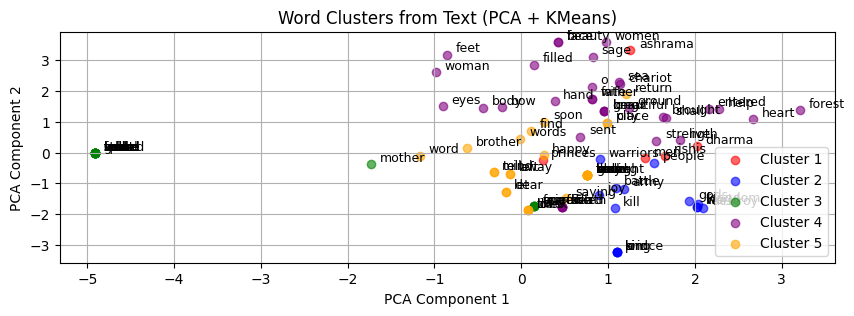

In [ ]:
import spacy
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load spaCy model with word vectors
nlp = spacy.load("en_core_web_md")

# Read the text
filename = "female_character_chapters.txt"
file_path = f"/content/{filename}"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()
doc = nlp(text)

# Filter tokens: real words, not stopwords/punct/digits/named entities
named_entities = {ent.text for ent in doc.ents}

words = [
    token.text.lower()
    for token in doc
    if token.is_alpha
    and not token.is_stop
    and token.text not in named_entities
]

# Get top 100 frequent words
top_words = [word for word, _ in Counter(words).most_common(100)]

# Get word vectors
word_vecs = np.array([nlp(word).vector for word in top_words if nlp(word).has_vector])
filtered_words = [word for word in top_words if nlp(word).has_vector]

# Clustering with KMeans
num_clusters = 5  # You can adjust this
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
labels = kmeans.fit_predict(word_vecs)

# Reduce dimensions for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vecs)

# Plot
plt.figure(figsize=(10, 3))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(num_clusters):
    xs = reduced[labels == i, 0]
    ys = reduced[labels == i, 1]
    plt.scatter(xs, ys, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

# Add word labels
for i, word in enumerate(filtered_words):
    plt.text(reduced[i, 0]+0.1, reduced[i, 1]+0.1, word, fontsize=9)

plt.title("Word Clusters from Text (PCA + KMeans)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()